In [16]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [17]:
imPath = "/Volumes/Data/WORKSPACE/git/bagiks/CMT-Text-Detection/upload/460884941172522-2015.12.05-11.36.03.jpg"
# imPath = "/Volumes/Data/Dropbox (Personal)/Screenshots/Screenshot 2017-04-14 14.23.12.png"

In [18]:
img = cv2.imread(imPath)

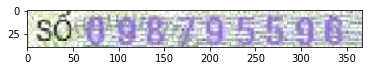

In [19]:
plt.imshow(img)

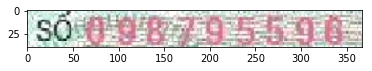

In [20]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(gray)

(170, 11, 12, 28)
(232, 9, 16, 29)
(132, 9, 20, 29)
(100, 9, 19, 29)
(100, 9, 19, 29)
(66, 9, 19, 26)
(297, 8, 19, 27)
(197, 8, 18, 30)
(197, 8, 15, 19)
(327, 6, 19, 32)
(263, 6, 18, 32)


'\n'

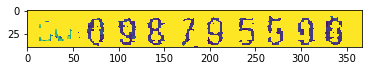

In [25]:
img_hsv=cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# lower mask (0-10)
lower_red = np.array([0,0,0])
upper_red = np.array([180, 255, 30])
mask0 = cv2.inRange(img_hsv, lower_red, upper_red)

# upper mask (170-180)
lower_red = np.array([0,40,40])
upper_red = np.array([180,255,255])
mask1 = cv2.inRange(img_hsv, lower_red, upper_red)

# join my masks
mask = mask0+mask1

# set my output img to zero everywhere except my mask
output_img = img.copy()
# output_img[np.where(mask==0)] = 0
output_img = cv2.bitwise_and(output_img, output_img, mask= mask1) 


output_img = cv2.cvtColor(output_img, cv2.COLOR_BGR2GRAY)
new_mask = np.zeros(output_img.shape, np.uint8)

new_mask[:] = 255

foreground = cv2.bitwise_not(output_img, output_img, mask=new_mask)

# plt.imshow(cv2.cvtColor(abc, cv2.COLOR_BGR2GRAY))

h,w  = foreground.shape
for i in range(h-1):
    for j in range(w-1):
        if foreground[i,j] < 80:
            foreground[i,j] = 255
            
kernel = np.ones((2,2),np.uint8)
# abc = cv2.morphologyEx(abc, cv2.MORPH_OPEN, kernel)
foreground = cv2.dilate(foreground,kernel,iterations = 1)

cv2.imwrite("/Users/kidio/final.jpg", foreground)
plt.imshow(foreground)


'''

# abc2 = cv2.bitwise_not(abc)
abc2=foreground


x1, y1  = abc2.shape
im2 = np.zeros(abc2.shape).astype('uint8')

im2 = abc2.copy()

# size = 3
# for i in range(x1-size):
#     for j in range(y1-size):
#         if abc2[i,j] < 50 and i > size and j >size:
#             im2[i-size:i+size,j-size:j+size] = 0

blurred = cv2.GaussianBlur(im2, (5, 5), 0)
xyz = cv2.Canny(im2, 100, 255)

cnts, _ = cv2.findContours(xyz, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)


i=0
for c in cnts:
    if cv2.arcLength(c, True) > 100 : 
        
        i = i + 1
        x0,y0,w0,h0 = cv2.boundingRect(c)
        
        print cv2.boundingRect(c)
        
        core = foreground[y0-3:y0+h0+3,x0-3:x0+w0+3]
        npad = ( (10,10), (10,10))
        pad_img = np.pad(core, pad_width=npad, mode='constant', constant_values=255)
        
        cv2.imwrite("/Users/kidio/crop/"+str(x0)+"_"+str(y0)+".jpg", np.array(pad_img))
                
        
        
plt.imshow(abc2)

cv2.imwrite("/Users/kidio/cnt.jpg", foreground)
'''

(40, 367)
46


True

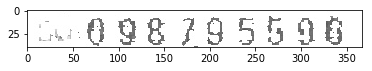

In [26]:
# retval, threshold = cv2.threshold(img, 10, 10, cv2.THRESH_BINARY)
img = cv2.imread("/Users/kidio/final.jpg")
abc = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
abc = cv2.bitwise_not(abc)
x, y  = abc.shape
im = np.zeros(abc.shape).astype('uint8')

size = 3
for i in range(x-size):
    for j in range(y-size):
        if abc[i,j] > 45 and i > size and j >size:
            im[i-size:i+size,j-size:j+size] = 255
            
# cv2.rectangle(im, (10,10), (30,50), 30)
# plt.imshow(im)

abc = im
print abc.shape
fake = np.zeros(abc.shape).astype('uint8')

blurred = cv2.GaussianBlur(abc, (5, 5), 0)
xyz = cv2.Canny(abc, 200, 255)


cnts, _ = cv2.findContours(xyz, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

print len(cnts)
i=0
for c in cnts:
    
    if cv2.arcLength(c, True) > 100 :
#         peri = cv2.arcLength(c, True)
#         appro =  cv2.approxPolyDP(c, 0.4* peri, True)
        cv2.drawContours(im, c, -1 , 200, -1)
    
        ymax , ymin = np.max(c[:,0,0]), np.min(c[:,0,0])
        xmax , xmin = np.max(c[:,0,1]), np.min(c[:,0,1])
        
        core = img[ xmin:xmax, ymin:ymax]
        npad = ( (8,8), (8,8), (0, 0))
        pad_img = np.pad(core, pad_width=npad, mode='constant', constant_values=255)
        
        cv2.imwrite("/Users/kidio/crop/"+str(ymax)+"-"+str(xmax)+".jpg", np.array(pad_img))
        
# for i in range(y-10):
#     if sum(xyz[:,i:i+1]) < 100:
#         fake[:,i] = 0

plt.imshow(img)

cv2.imwrite("/Users/kidio/cnt.jpg", img)




(40, 367)
47
(293, 5, 25, 34)
(293, 5, 25, 34)
(228, 5, 23, 34)
(228, 5, 23, 34)
(166, 5, 19, 34)
(166, 5, 19, 34)
(128, 5, 25, 34)
(62, 5, 24, 34)
(193, 4, 24, 35)
(193, 4, 24, 35)
(323, 2, 24, 37)
(323, 2, 24, 37)
(259, 2, 24, 37)
(95, 2, 26, 37)


True

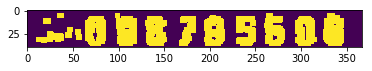

In [46]:
# retval, threshold = cv2.threshold(img, 10, 10, cv2.THRESH_BINARY)
def temp(pic):
    img = cv2.imread("/Users/kidio/final.jpg")
abc = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
abc = cv2.bitwise_not(abc)
x, y  = abc.shape
im = np.zeros(abc.shape).astype('uint8')

size = 3
for i in range(x-size):
    for j in range(y-size):
        if abc[i,j] > 80 and i > size and j >size:
            im[i-size:i+size,j-size:j+size] = 255

abc = im
print abc.shape
fake = np.zeros(abc.shape).astype('uint8')

blurred = cv2.GaussianBlur(abc, (5, 5), 0)
xyz = cv2.Canny(abc, 200, 255)


cnts, _ = cv2.findContours(xyz, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

print len(cnts)
i=0
for c in cnts:
    if cv2.arcLength(c, True) > 100 :
        
        i = i + 1
        x,y,w,h = cv2.boundingRect(c)
        
        print cv2.boundingRect(c)
        
        core = img[y:y+h,x:x+w]
        npad = ( (10,10), (10,10), (0, 0))
        pad_img = np.pad(core, pad_width=npad, mode='constant', constant_values=255)
        
        cv2.imwrite("/Users/kidio/crop/"+str(y)+str(x)+".jpg", np.array(pad_img))
        

plt.imshow(im)

cv2.imwrite("/Users/kidio/cnt.jpg", abc)




In [42]:
img = cv2.imread('/Volumes/Data/Dropbox (Personal)/Screenshots/digits/black.png')

In [43]:
img_hsv=cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [ ]:
# cvInRangeS(imgHSV, cvScalar(0, 0, 0, 0), cvScalar(180, 255, 30, 0), imgThreshold);

In [36]:
lower_black = np.array([0, 0, 200])
upper_black = np.array([180, 255, 255])
mask2 = cv2.inRange(img_hsv, lower_black, upper_black)

In [37]:
# set my output img to zero everywhere except my mask
output_img = img.copy()
# output_img[np.where(mask==0)] = 0
output_img = cv2.bitwise_or(output_img, output_img, mask= mask2)

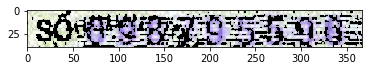

In [38]:
plt.imshow(output_img)

In [39]:
kernel = np.ones((5,5),np.uint8)
#output_img = cv2.morphologyEx(output_img, cv2.MORPH_OPEN, kernel)
output_img = cv2.dilate(output_img,kernel,iterations = 1)

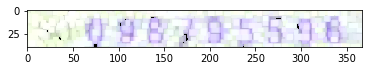

In [40]:
plt.imshow(output_img)

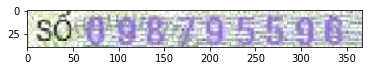

In [41]:
plt.imshow(img)

In [108]:
def pad(array, reference, offsets):
    """
    array: Array to be padded
    reference: Reference array with the desired shape
    offsets: list of offsets (number of elements must be equal to the dimension of the array)
    """
    # Create an array of zeros with the reference shape
    result = np.zeros(reference.shape)
    # Create a list of slices from offset to offset + shape in each dimension
    insertHere = [slice(offset[dim], offset[dim] + array.shape[dim]) for dim in range(a.ndim)]
    # Insert the array in the result at the specified offsets
    result[insertHere] = a
    return result

In [102]:

# 3 Dimensions

a = np.ones((18, 32, 3))
b = np.zeros((23, 37, 3))
offset = [1,0,0]
pad(a, b, offset)

array([[[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        ..., 
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        ..., 
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       ..., 
       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,

In [127]:
def padwithtens(vector, pad_width, iaxis, kwargs):
    vector[:pad_width[0]] = 10
    vector[-pad_width[1]:] = 10
    return vector

a  = np.zeros(8)
a = a.reshape((2,2,2))
np.lib.pad(a, 1, padwithtens)

array([[[ 10.,  10.,  10.,  10.],
        [ 10.,  10.,  10.,  10.],
        [ 10.,  10.,  10.,  10.],
        [ 10.,  10.,  10.,  10.]],

       [[ 10.,  10.,  10.,  10.],
        [ 10.,   0.,   0.,  10.],
        [ 10.,   0.,   0.,  10.],
        [ 10.,  10.,  10.,  10.]],

       [[ 10.,  10.,  10.,  10.],
        [ 10.,   0.,   0.,  10.],
        [ 10.,   0.,   0.,  10.],
        [ 10.,  10.,  10.,  10.]],

       [[ 10.,  10.,  10.,  10.],
        [ 10.,  10.,  10.,  10.],
        [ 10.,  10.,  10.,  10.],
        [ 10.,  10.,  10.,  10.]]])

In [140]:
a = np.ones((2, 2, 2))
print a

# npad is a tuple of (n_before, n_after) for each dimension
npad = ( (1,1), (1,1), (0, 0))
b = np.pad(a, pad_width=npad, mode='constant', constant_values=0)

print(b.shape)
# (4, 6, 5)
print b


[[[ 1.  1.]
  [ 1.  1.]]

 [[ 1.  1.]
  [ 1.  1.]]]
(4, 4, 2)
[[[ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]]

 [[ 0.  0.]
  [ 1.  1.]
  [ 1.  1.]
  [ 0.  0.]]

 [[ 0.  0.]
  [ 1.  1.]
  [ 1.  1.]
  [ 0.  0.]]

 [[ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]]]
